In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [58]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression.
    
        * 'c' : constant only (default).
        * 'ct' : constant and trend.
        * 'ctt' : constant, and linear and quadratic trend.
        * 'nc' : no constant, no trend.
    
    autolag : {'AIC', 'BIC', 't-stat', None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if 'AIC' (default) or 

In [3]:
np.random.seed(999)

In [53]:
mean = 0
std= 1

In [54]:
samples = np.random.normal(mean,std,size=10000)

In [55]:
samples

array([ 0.36567255,  0.2613989 , -1.09088596, ..., -1.15496569,
       -0.52015035, -0.55537843])

In [15]:
# auto correlation function

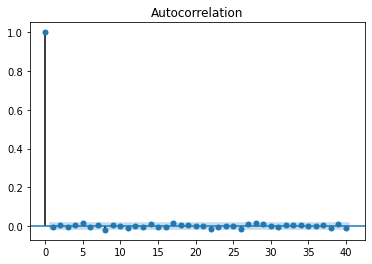

In [20]:
plot_acf(samples);

In [27]:
w = np.arange(start=1,stop=100,step=1)

In [28]:
w

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

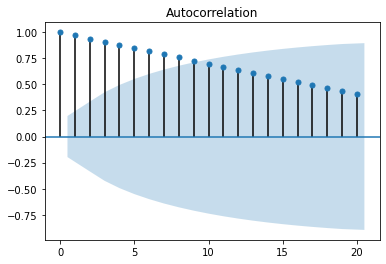

In [29]:
plot_acf(w);

In [30]:
u = np.arange(start=1,stop=100,step=5)

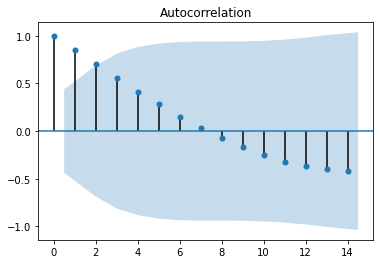

In [32]:
plot_acf(u);

In [33]:
z = np.repeat(np.array([1,2,3,4,5]),100)

In [34]:
z

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,

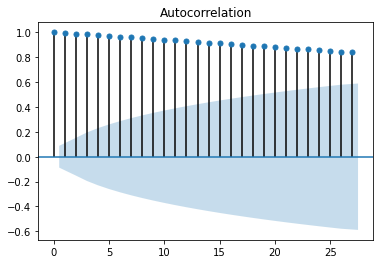

In [36]:
plot_acf(z);

In [51]:
t = np.array([])
for j in range(1,100):
    t_append = []
    for i in range(1,6):        
        t_append.append(i)
    t = np.append(t,t_append)
t
    

array([1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2.,
       3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4.,
       5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1.,
       2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3.,
       4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5.,
       1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2.,
       3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4.,
       5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1.,
       2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3.,
       4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5.,
       1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2.,
       3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4.,
       5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1.,
       2., 3., 4., 5., 1.

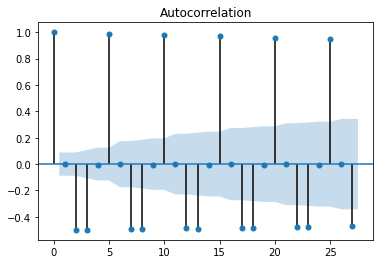

In [52]:
plot_acf(t);